<a href="https://colab.research.google.com/github/alfanadhya/acne-detection-with-glcm-and-gabor/blob/main/training_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# LIBRARIES
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# to save model
import joblib

In [ ]:
# Load features
feats_path = '/content/drive/MyDrive/DatasetTA_Playground/experiments/features/glcm_features_grayscale_16.xlsx'
feats_df = pd.read_excel(feats_path)

In [ ]:
feats_df.iloc[:,1:-1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.007987,0.005550,0.003172,0.005464,0.942061,0.916175,0.951749,0.918274,0.485196,0.446894,0.436549,0.449300,0.936842,0.897507,0.935058,0.900277
1,0.016140,0.007049,0.004903,0.011991,0.938657,0.943034,0.963100,0.905612,0.377276,0.371594,0.355877,0.336482,0.872368,0.869806,0.899636,0.794460
2,0.031780,0.011324,0.010382,0.029598,0.982990,0.987310,0.989135,0.967620,0.195960,0.213377,0.142627,0.168121,0.758158,0.810803,0.808717,0.626039
3,0.039434,0.023398,0.004182,0.012826,0.961648,0.953420,0.992064,0.974624,0.265203,0.251422,0.285388,0.282141,0.748158,0.687535,0.914395,0.802493
4,0.007321,0.008324,0.006633,0.008955,0.937774,0.856328,0.886600,0.848227,0.499071,0.412640,0.387995,0.405801,0.942105,0.849584,0.864213,0.839889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1774,0.017563,0.013126,0.005337,0.008302,0.868641,0.787437,0.918826,0.863070,0.437996,0.375287,0.413202,0.416046,0.877778,0.775758,0.890742,0.848485
1775,0.009033,0.004571,0.001245,0.004626,0.707560,0.688293,0.919993,0.688293,0.670905,0.667853,0.698387,0.667853,0.928571,0.915584,0.974506,0.915584
1776,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = feats_df.iloc[:,1:-1]
y = feats_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

3 0.8455056179775281


Text(0.5, 1.0, 'KNN Testing Accuracy - YCrCb 16')

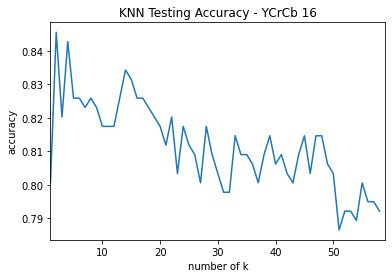

In [ ]:
# try K and record testing accuracy
k_range = range(1, 60)

knn_scores = []
knn_models = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models.append(knn)

    y_pred = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, y_pred))

best_k = knn_scores.index(max(knn_scores))
print(best_k+1, max(knn_scores))

plt.plot(knn_scores)
plt.xlabel('number of k')
plt.ylabel('accuracy')
plt.xlim([1, 59])
plt.title('KNN Testing Accuracy - YCrCb 16')

In [ ]:
joblib.dump(knn_models[best_k], '/content/drive/MyDrive/DatasetTA_Playground/experiments/knn_models/knn_grayscale_16.pkl')

['/content/drive/MyDrive/DatasetTA_Playground/experiments/knn_models/knn_grayscale_16.pkl']

## Coba SVM dan Naive Bayes

In [ ]:
from sklearn.svm import SVC
SVC_clf = SVC(kernel = 'linear')

SVC_clf.fit(X_train, y_train)
SVC_y_pred = SVC_clf.predict(X_test)

svm_score = accuracy_score(y_test, SVC_y_pred)
svm_score

0.6938202247191011

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train, y_train)

#Predict Output
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
nb_score

0.6432584269662921